# Herkenning van handgeschreven cijfers met Machine Learning

## k-Nearest Neigbours

Stijn Oomes

donderdag 11 februari 2020


## Importeer libraries

In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist

## Verover de data

In [2]:
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = mnist.load_data()

In [3]:
X_train_images.shape

(60000, 28, 28)

In [4]:
y_train_labels.shape

(60000,)

Hier check ik hoeveel unieke labels er zijn. (En het voldoet aan mijn verwachting.)

In [5]:
np.unique(y_train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
X_test_images.shape

(10000, 28, 28)

In [7]:
y_test_labels.shape

(10000,)

Ik kijk nog even naar een aantal voorbeelden van de labels.

In [8]:
print(y_train_labels[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


## Toon 12 random cijfers

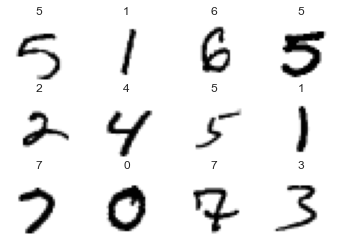

In [9]:
for sub in range(1, 13):
        plt.subplot(3,4, sub)
        i = np.random.randint(60000)

        plt.imshow(255 - X_train_images[i], cmap='gray')
        plt.title(y_train_labels[i]);
        plt.axis("off")

## Maak de images geschikt voor ML modellen

**OPDRACHT**: "flatten" de images naar een nieuwe data structuur met dimensies (60000, 28*28)

In [10]:
X_train_images_flatten = X_train_images.reshape(60000, 28*28)

In [11]:
X_train_images_flatten.shape

(60000, 784)

In [12]:
X_test_images_flatten = X_test_images.reshape(10000, 28*28)

In [13]:
X_test_images_flatten.shape

(10000, 784)

## k-Nearest Neighbours


Het is beter om in eerste instantie slechts een deel van de training set en de test set te gebruiken, bijvoorbeeld 10%.

Het trainen duurt niet lang, maar het voorspellen kan zeer rekenintensief zijn.

Gebruik %%timeit om deze bewering te controleren.

In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

**OPDRACHT**: train de kNN met fit() en pas het model toe met predict(). Kies eerst 10% van de train set en test set. Je mag dat later verruimen.

In [15]:
%%timeit
knn.fit(X_train_images_flatten[:6000,:],y_train_labels[:6000])

1.13 s ± 122 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%%timeit
y_predicted_labels = knn.predict(X_test_images_flatten[:1000,:])
print(accuracy_score(y_test_labels[:1000], y_predicted_labels[:1000]))

0.919
0.919
0.919
0.919
0.919
0.919
0.919
0.919
6.1 s ± 75.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**OPDRACHT**: Hoe snel is het testen ten opzichte van het trainen?

Mijn tijden in ms

In [26]:
122/75.4

1.6180371352785146

Ik herhaal hier even dezelfde code omdat variabelen binnen de %%timeit niet toegankelijk zijn buiten de %%timeit.

In [18]:
y_predicted_labels = knn.predict(X_test_images_flatten[:1000,:])
print(accuracy_score(y_test_labels[:1000], y_predicted_labels[:1000]))

0.919


In [19]:
cm = confusion_matrix(y_test_labels[:1000], y_predicted_labels[:1000])

print(cm)

[[ 83   0   0   0   0   0   2   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  2   4  98   0   1   0   2   7   2   0]
 [  0   1   0  98   0   2   2   2   0   2]
 [  0   2   0   0  98   0   1   1   0   8]
 [  1   1   0   0   1  81   0   0   2   1]
 [  2   0   0   0   1   0  84   0   0   0]
 [  0   6   0   0   1   1   0  89   0   2]
 [  2   1   0   4   1   1   2   0  74   4]
 [  0   0   0   0   2   0   0   2   2  88]]


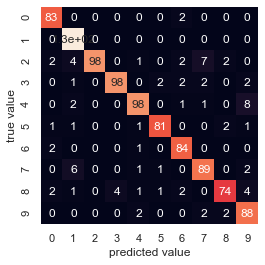

In [20]:
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Toon 12 voorbeelden van fouten van het model

Ik bepaal eerst welke cijfers fout zijn gecategoriseerd.

In [21]:
mistakes =  y_test_labels[:1000]!=y_predicted_labels[:1000]

Ik bekijk een aantal voorbeelden.

In [22]:
mistakes[:100]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False])

En bepaal hoeveel fouten er zijn:

In [23]:
np.count_nonzero(mistakes)

81

Ik wil hier alleen de fout gecategoriseerde cijfers plotten.

Op dit moment worden 12 willekeurige cijfers uit de *hele* test set gekozen.

**OPDRACHT**: schrijf de code om naar alleen fout geclassificeerde cijfers.

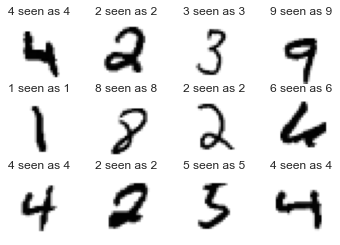

In [24]:
for sub in range(1,13):
        plt.subplot(3,4, sub)
        i = np.random.randint(1000)
        plt.axis("off")
        plt.imshow(255 - X_test_images[i,:,:], cmap='gray')
        predicted_number = y_predicted_labels[i]
        actual_number = y_test_labels[i]
        plt.title('{0} seen as {1}'.format(actual_number, predicted_number))


In [32]:
#Generate wrong prediciton list
wrong_index = []
for i in range(len(y_predicted_labels)):
    if y_predicted_labels[i] != y_test_labels[i]:
        wrong_index.append(i)
print(wrong_index)

[24, 43, 77, 80, 92, 111, 115, 149, 159, 175, 195, 241, 242, 245, 247, 250, 257, 264, 266, 268, 290, 300, 303, 320, 321, 324, 326, 338, 341, 349, 358, 362, 367, 381, 445, 464, 479, 492, 495, 511, 542, 543, 547, 551, 571, 583, 613, 628, 635, 646, 654, 659, 667, 684, 689, 691, 707, 717, 726, 740, 760, 781, 791, 795, 797, 830, 839, 844, 866, 881, 882, 924, 926, 930, 936, 938, 939, 947, 951, 957, 965]


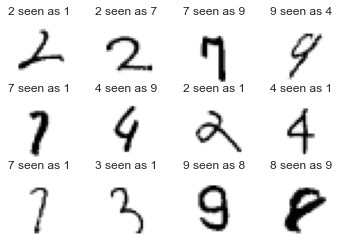

In [34]:
for sub in range(1,13):
        plt.subplot(3,4, sub)
        i = wrong_index[sub]
        plt.axis("off")
        plt.imshow(255 - X_test_images[i,:,:], cmap='gray')
        predicted_number = y_predicted_labels[i]
        actual_number = y_test_labels[i]
        plt.title('{0} seen as {1}'.format(actual_number, predicted_number))